# Building Machine Learning Models

## Part 2: Building a Decision Tree model.

This `Part 2` will build a Decision Tree model with a dataset prepared from `Part 1`.
1. Loading the data for modeling prepard by`Part 1`. 
2. Building a decision tree model.
3. Tuning hyperparameters using `GridSearchCV`.
4. Evaluating a decision tree model using a confusion matrix and various other plots.

### 1. Loading the data

#### 1.1. Import packages

Import relevant Python packages.

In [1]:
# Standard operational packages
import numpy as np
import pandas as pd

# Modeling packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
    confusion_matrix, ConfusionMatrixDisplay
    
# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.2. Load the dataset

`Pandas` is used to load the `Galactico_Airline_prepared.csv`. The resulting pandas `DataFrame` is saved in a variable named `df`.

In [2]:
df = pd.read_csv('Galactico_Airline_prepared.csv').drop(columns=['Unnamed: 0'])
df

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
0,1,65,1,265,0,0,0,2,2,4,...,3,5,3,2,0,0.0,1,0,0,1
1,1,47,3,2464,0,0,0,3,0,2,...,4,2,3,2,310,305.0,1,0,0,1
2,1,15,1,2138,0,0,0,3,2,0,...,4,4,4,2,0,0.0,1,0,0,1
3,1,60,1,623,0,0,0,3,3,4,...,1,4,1,3,0,0.0,1,0,0,1
4,1,70,1,354,0,0,0,3,4,3,...,2,4,2,5,0,0.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,1,29,1,1731,5,5,5,3,2,5,...,4,4,4,2,0,0.0,0,1,0,1
129483,0,63,3,2087,2,3,2,4,2,1,...,3,1,2,1,174,172.0,0,1,0,1
129484,0,69,1,2320,3,0,3,3,3,2,...,4,2,3,2,155,163.0,0,1,0,1
129485,0,66,1,2450,3,2,3,2,3,2,...,3,2,1,2,193,205.0,0,1,0,1


### 2. Building a decision tree model

#### 2.1. Create the training and testing data

Put `75%` of the data into a `training` set and the remaining `25%` into a `testing` set. 

In [3]:
y = df['satisfaction']
X = df.drop(columns=['satisfaction'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97115, 23), (32372, 23), (97115,), (32372,))

#### 2.2. Fit a decision tree classifier model to the data

1. Make a decision tree instance called `decision_tree` and pass in `0` to the `random_state` parameter.
2. Fit the model on the training set.
3. Use the `predict()` function on the testing set and assign those predictions to the variable `y_pred`. 

In [4]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [8]:
y_pred = decision_tree.predict(X_test)

#### 2.2. Review the metrics

Print out the decision tree model's metrics:
* `accuracy`
* `precision`
* `recall`
* `f1`

In [9]:
accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
precision = precision_score(y_pred=y_pred, y_true=y_test)
recall = recall_score(y_pred=y_pred, y_true=y_test)
f1 = f1_score(y_pred=y_pred, y_true=y_test)

print('accuracy:\t', accuracy)
print('precision:\t', precision)
print('recall:\t\t', recall)
print('f1:\t\t', f1)

accuracy:	 0.9343877424935129
precision:	 0.9416959130533228
recall:		 0.9382966723068246
f1:		 0.939993219572833


#### 2.3. Store the result

* Create a `DataFrame` object and add the result to it.

In [18]:
# Create a `DataFrame` object and add the result to it.
results = pd.DataFrame([{
    'Model': str('Decision Tree'),
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1
}])
results

,Model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.934388,0.941696,0.938297,0.939993


#### 2.4. Plot the decision tree

Examine the decision tree. `plot_tree()` function produces a visual representation of the tree to pinpoint splits in the data.

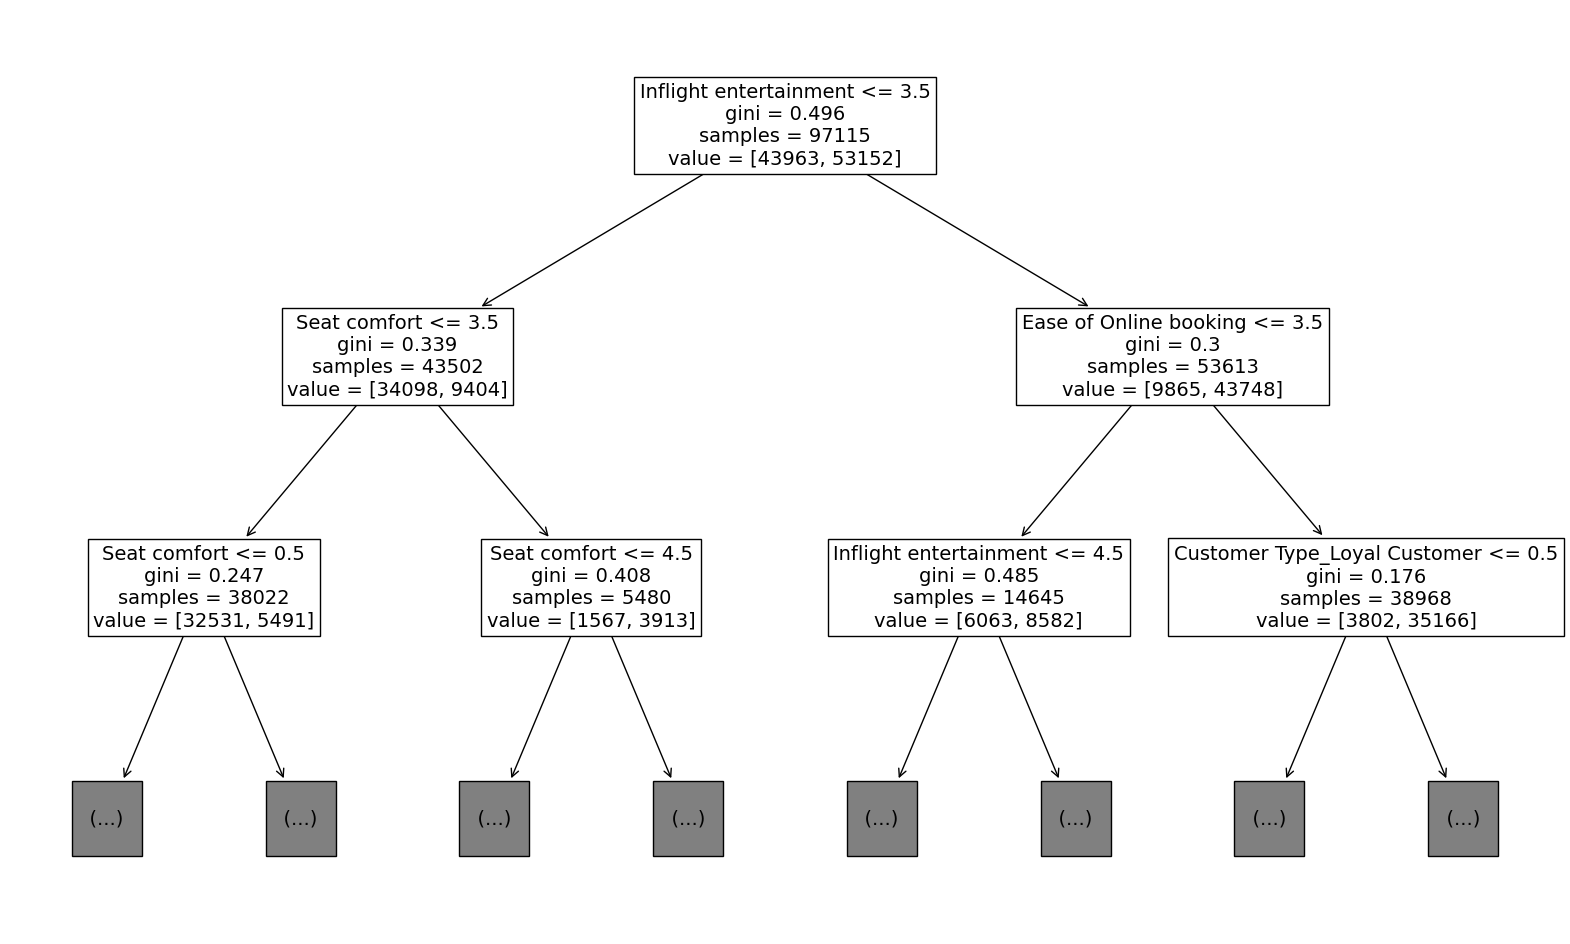

In [12]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree=decision_tree, max_depth=2, feature_names=X.columns, fontsize=14);

### 3. Tuning hyperparameters

#### 3.1. Set hyperparameters

Knowing how and when to adjust or tune a model can help significantly increase performance. 

Use `grid search and cross validation` in order to find the best values for the hyperparameters `max_depth` and `min_samples_leaf`.

In [14]:
params = {
    'max_depth':[1,2,3,5,8,13,21,34,55,None],
    'min_samples_leaf':[1,2,3,5,8,13,21,34,55]
}

scoring = {
    'accuracy',
    'precision',
    'recall',
    'f1'
}

#### 3.2. Check combinations of values

Check every combination of values to examine which pair has the best evaluation metrics.

Use `GridSearchCV` instance to figure it out.

Note: It would take up to 10 minutes.

In [15]:
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

clf = GridSearchCV(estimator=tuned_decision_tree,
                   param_grid=params,
                   scoring=scoring,
                   cv=5,
                   refit='f1',
                   n_jobs=-1,
                   verbose=1)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 8, 13, 21, 34, 55, None],
                         'min_samples_leaf': [1, 2, 3, 5, 8, 13, 21, 34, 55]},
             refit='f1', scoring={'precision', 'recall', 'f1', 'accuracy'},
             verbose=1)

In [45]:
y_pred_tuned = clf.predict(X_test)

#### 3.3 Compute the best combination of values for the hyperparameters

In [16]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=21, min_samples_leaf=2, random_state=0)

After running the `DecisionTreeClassifier`, the `maximum depth` is `21` and the `minimum number of samples` is `2`, meaning this is the best combination of values.

#### 3.4. Determine the best average validation score

The tuned tree model computes the `f1` score for the validation.

In [17]:
clf.best_score_

0.9432945786256696

#### 3.5. Determine the best decision tree model's metrics

1. Extract the metrics.
2. Create a dataframe & put them into it.
3. Append the dataframe into `results`, the dataframe already created above.
4. Store the dataframe to `CSV` file.

In [31]:
# 1. Extract the metrics
cv_results = pd.DataFrame(clf.cv_results_)

best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(),:]

cv_accuracy  = best_estimator_results.mean_test_accuracy
cv_precision = best_estimator_results.mean_test_precision
cv_recall    = best_estimator_results.mean_test_recall
cv_f1        = best_estimator_results.mean_test_f1

# 2. Create a dataframe & put them into it.
tuned_results = pd.DataFrame([{
    'Model': str('Tuned Decision Tree'),
    'Accuracy': cv_accuracy,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F1': cv_f1
}])

# 3. Append the dataframe into results dataframe.
results = pd.concat([results, tuned_results], ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.934388,0.941696,0.938297,0.939993
1,Tuned Decision Tree,0.938465,0.951619,0.935129,0.943295


#### 3.6. Store the results datafram to csv file

In [32]:
# Save the object to a `CSV` file.
results.to_csv('ml_results.csv')

#### 3.7. Plot the best decision tree

Use `plot_tree()` function to visualize the decision tree model.

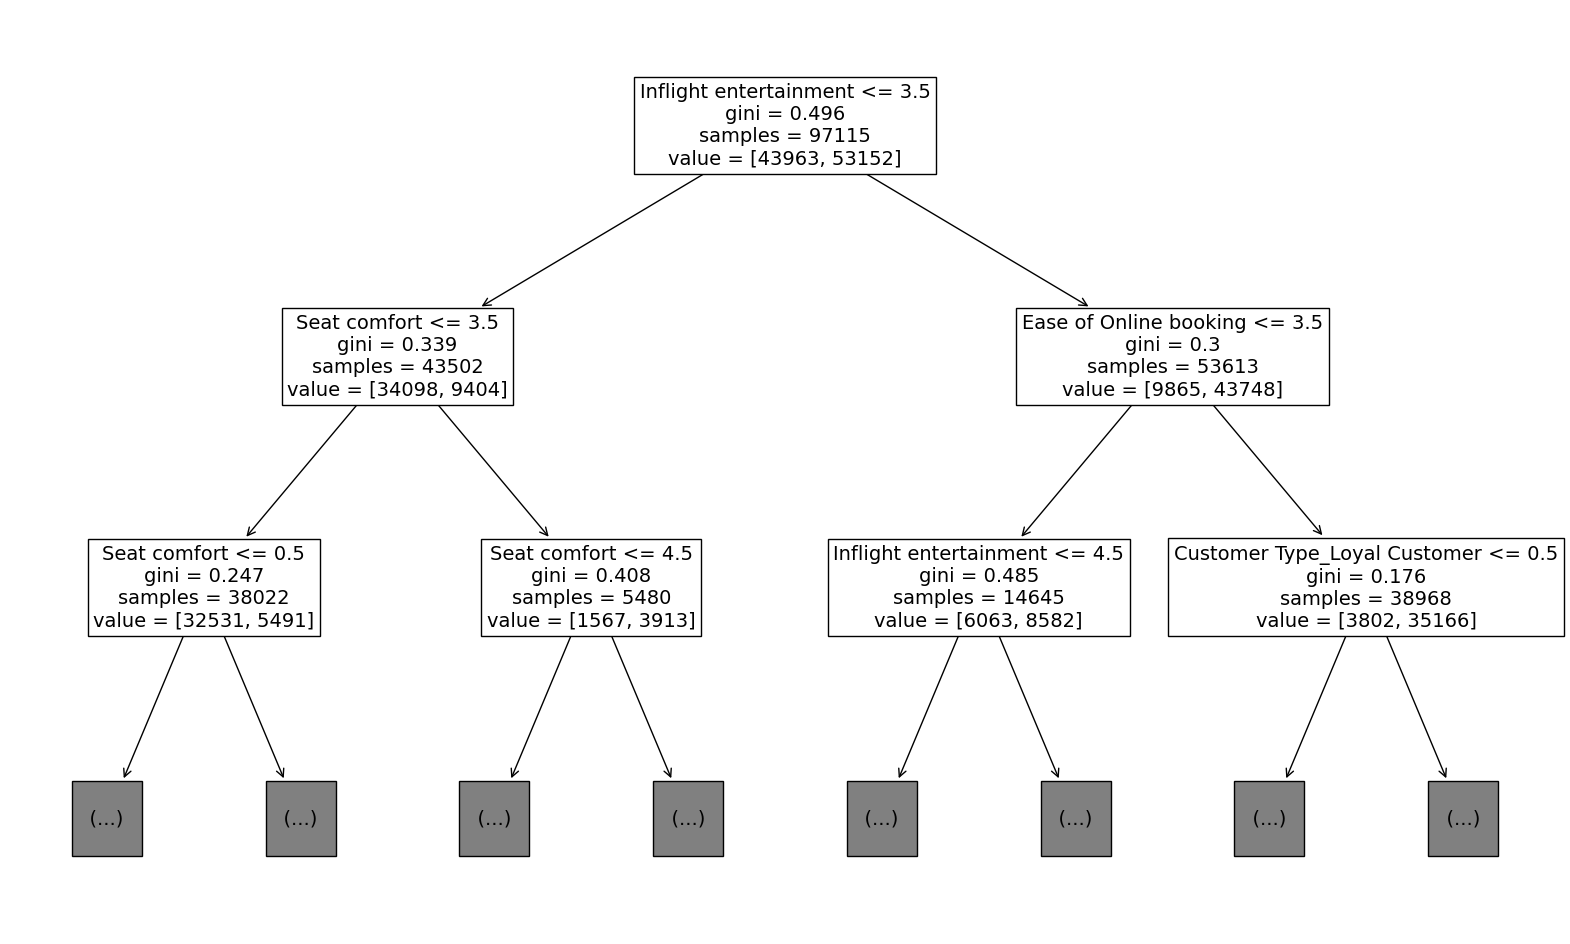

In [33]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree=clf.best_estimator_, max_depth=2, feature_names=X.columns, fontsize=14);

### 4. Evaluating a decision tree model using a confusion matrix and various other plots.

#### 4.1. Concept of 4 metrics
* `Accuracy` (TP+TN/TP+FP+FN+TN): The ratio of correctly predicted observations to total observations. It tends to be the metric that stakeholders can best understand.

* `Precision` (TP/TP+FP): The ratio of correctly predicted positive observations to total predicted positive observations.

* `Recall` (Sensitivity, TP/TP+FN): The ratio of correctly predicted positive observations to all observations in actual class.

* `F1`: The harmonic average of precision and recall, which takes into account both false positives and false negatives.

#### 4.2. Produce a confusion matrix

Analyzing the types of errors made by an algorithm. To obtain the information, produce a `confusion matrix`.

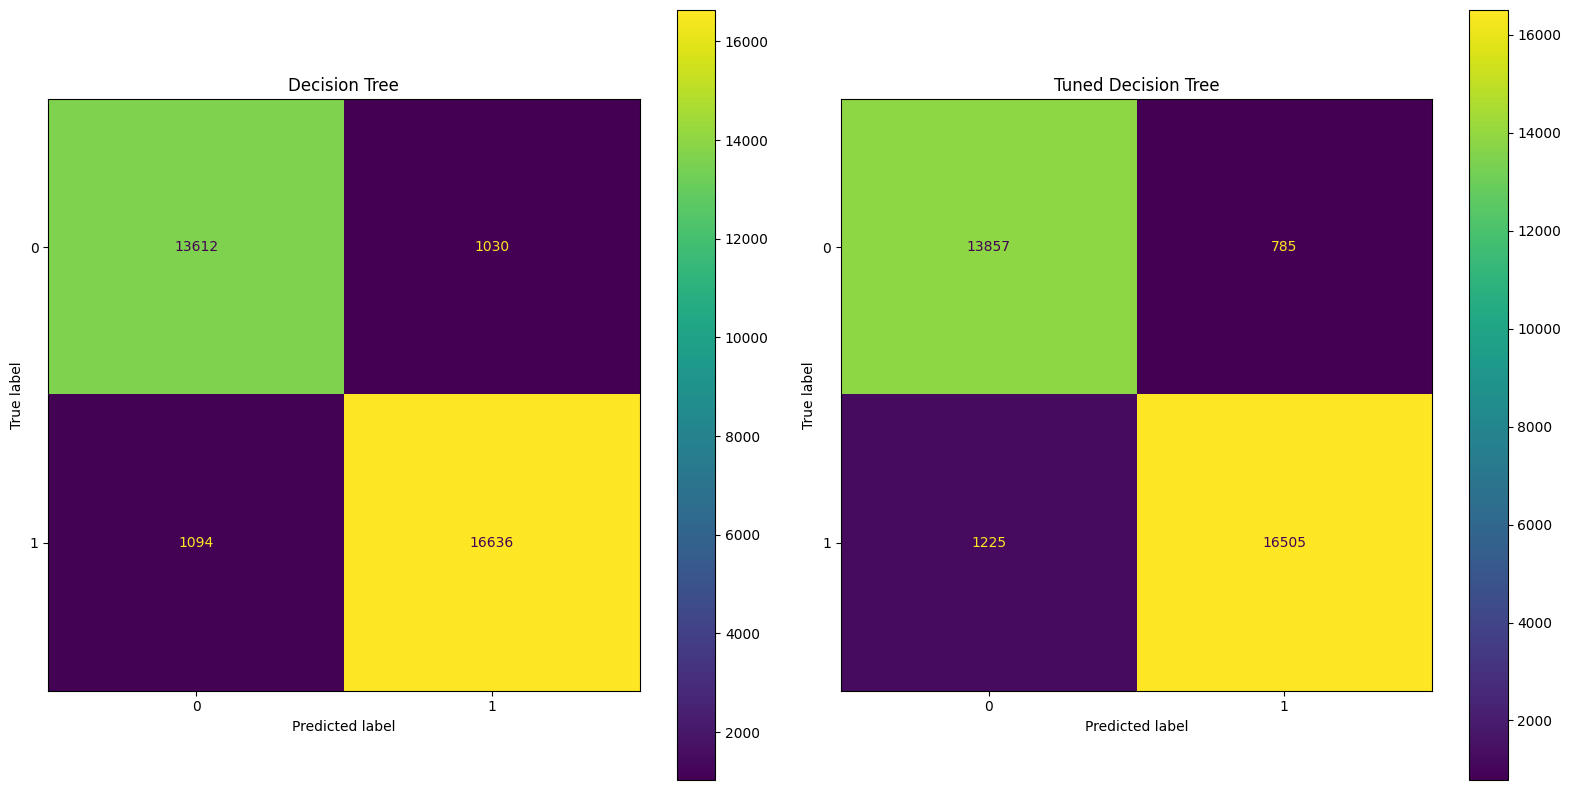

In [61]:
c_fig, c_ax = plt.subplots(1,2,figsize=(16,8))
cm_og = confusion_matrix(y_pred=y_pred, y_true=y_test, labels=decision_tree.classes_)
cm_tn = confusion_matrix(y_pred=y_pred_tuned, y_true=y_test, labels=clf.classes_)

ConfusionMatrixDisplay(confusion_matrix=cm_og, display_labels=decision_tree.classes_).plot(ax=c_ax[0])
c_ax[0].set_title('Decision Tree')
ConfusionMatrixDisplay(confusion_matrix=cm_tn, display_labels=clf.classes_).plot(ax=c_ax[1])
c_ax[1].set_title('Tuned Decision Tree')
plt.tight_layout();

In [63]:
results

,Model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.934388,0.941696,0.938297,0.939993
1,Tuned Decision Tree,0.938465,0.951619,0.935129,0.943295


#### 4.3. Analyze the Matrics of the two models
- Both show `high` proportion of `true positives` and `true negatives`.
- Both show `low` proportion of `false positives` and `false negatives`.

#### 4.4. Build a feature importance graph

Check out which features might be important to the decision tree model by building a feature importance graph.

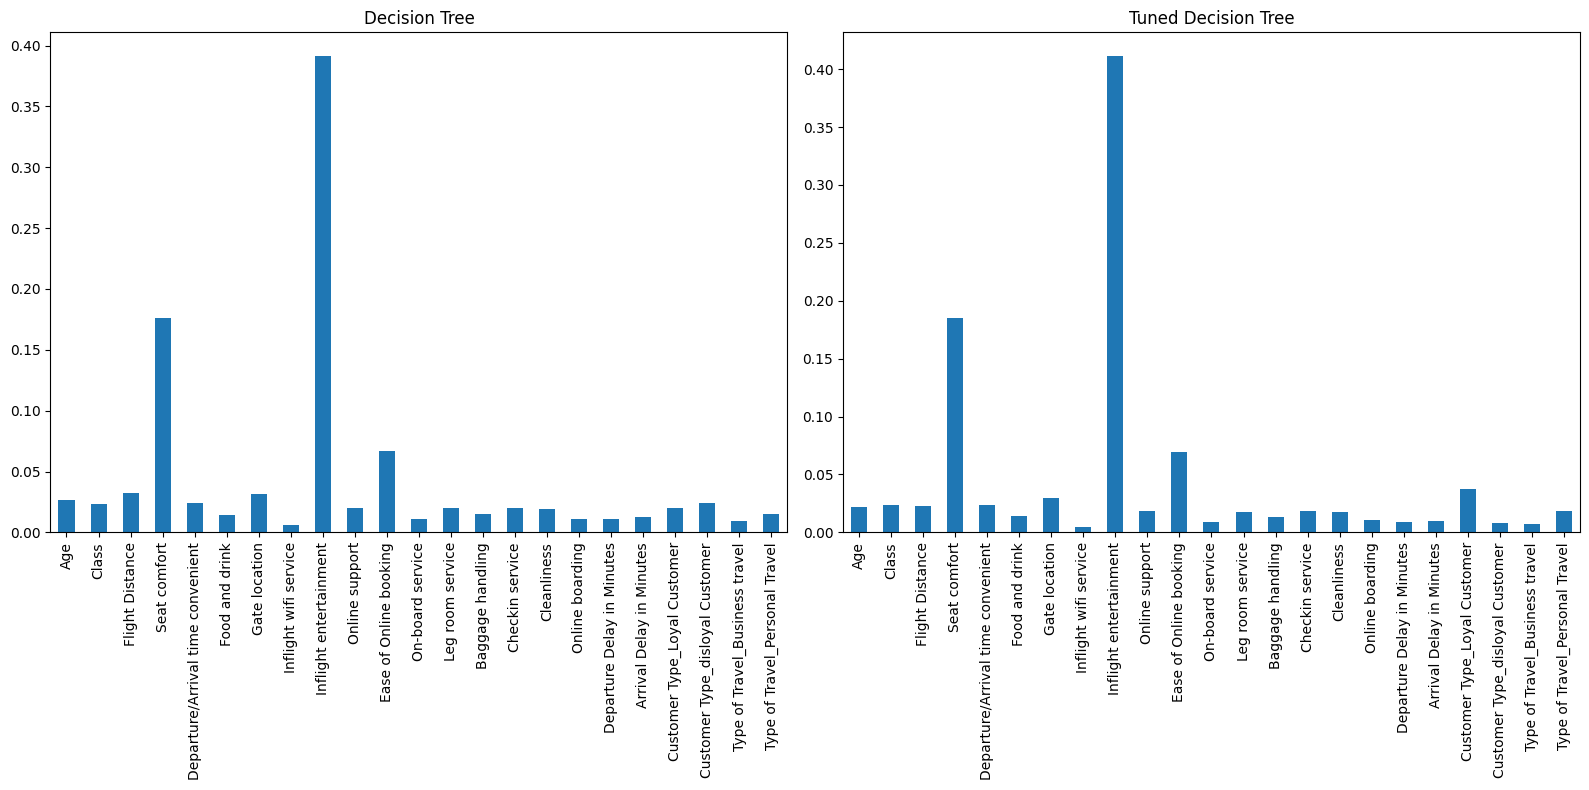

In [60]:
i_fig, i_ax = plt.subplots(1,2,figsize=(16,8))

importances_1 = decision_tree.feature_importances_
importances_og = pd.Series(importances_1, index=X.columns)

importances_2 = clf.best_estimator_.feature_importances_
importances_tn = pd.Series(importances_2, index=X.columns)

importances_og.plot.bar(ax=i_ax[0])
i_ax[0].set_title('Decision Tree')
importances_tn.plot.bar(ax=i_ax[1])
i_ax[1].set_title('Tuned Decision Tree')

plt.tight_layout();

For both the original and tuned decision tree models, the feature importance graph shows the top three feature for this model.
1. `Inflight entertainment`
2. `Seat comfort`
3. `Ease of Online booking`

#### 4.5. Summary
- Both `Decision Tree` and `Tuned Decision Tree` models perform well and show similar results.
- They accurately predicted satisfaction approximately 94 percent of the time.  
- There are no big differences between the two models, but the small ones can be ignored.
- Overall, the `Tuned` model shows slightly better results.

### Considerations

Takeaways
* Machine learning workflows may be used to clean and encode data for machine learning.
* While hyperparameter tuning can lead to an increase in performance, it doesn't always. 
* The visualization of the decision tree as well as the feature graph can be used to determine which features are most important for a decision tree.


Recommendations to stakeholders
* Customer satisfaction is highly tied to `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'`. Improving these experiences should lead to better customer satisfaction. 
* The success of the model suggests that the airline should invest more effort into model building and model understanding since this model semed to be very good at predicting customer satisfaction. 

#### References

The Nuts and Bolts of Machine Learning: Build a decision tree model (Coursera)
https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/ungradedLab/KPS5v/exemplar-build-a-decision-tree